In [9]:
#My  notebook is inspired by 
#https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
#Tjerk
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [10]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [41]:
from sklearn.svm import SVC # "Support vector classifier"


X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

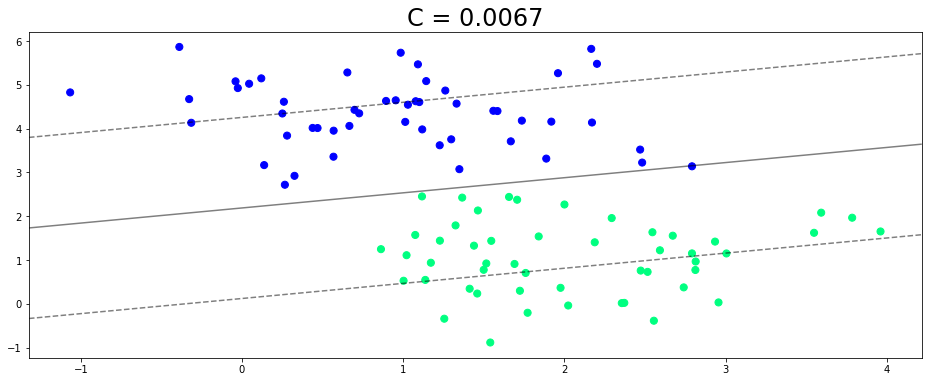

In [59]:
# big C hard margin
# small C soft margin

#C = 0.05

def plot_svm(C=1000):
    X, y = make_blobs(n_samples=100, centers=2,
                      random_state=0, cluster_std=0.8)

    fig, axi = plt.subplots(1, 1, figsize=(16, 6))

    clf = SVC(kernel='linear', C=C)
    model = clf.fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.4f}'.format(C), size=24)

plot_svm(0.0067)



In [60]:
C_values = [0.0067, 1000, 0.38]
from ipywidgets import interact, fixed
interact(plot_svm, C=C_values)

interactive(children=(Dropdown(description='C', index=1, options=(0.0067, 1000, 0.38), value=1000), Output()),…

<function __main__.plot_svm(C=1000)>

In [66]:
def plot_svm2(C=1000, N=100):
    X, y = make_blobs(n_samples=N, centers=2,
                      random_state=0, cluster_std=0.8)

    fig, axi = plt.subplots(1, 1, figsize=(16, 6))

    clf = SVC(kernel='linear', C=C)
    model = clf.fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.4f}, and N = {1}'.format(C, N), size=24)
    
#N = 5
#plot_svm2(0.0067, N)

interact(plot_svm2, C=C_values, N = [2, 5, 10, 20, 2000])

interactive(children=(Dropdown(description='C', index=1, options=(0.0067, 1000, 0.38), value=1000), Dropdown(d…

<function __main__.plot_svm2(C=1000, N=100)>

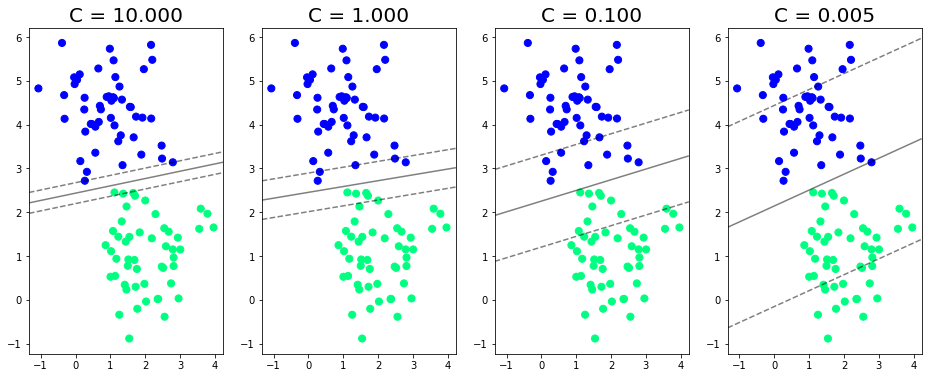

In [69]:
# putting it in subplots for your reports
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 4, figsize=(16, 6))
#fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10, 1, 0.1, 0.005]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    #  colormaps autumn, cool, winter, spring, summer
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.3f}'.format(C), size=20)



In [70]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [71]:
len(faces.target_names)

8

In [72]:
faces.target

array([1, 3, 3, ..., 7, 3, 5])

In [73]:
faces.target.shape

(1348,)

In [76]:
idx = faces.target[146]
idx

6

In [77]:
faces.target_names[6]

'Junichiro Koizumi'

In [78]:
faces.target_names[idx]

'Junichiro Koizumi'

In [79]:
faces.target.min()

0

In [80]:
faces.images.shape

(1348, 62, 47)

In [ ]:
# 1348 items of a 62 x 47 image

In [82]:
62 * 47

2914

In [83]:
faces.images[64].shape

(62, 47)

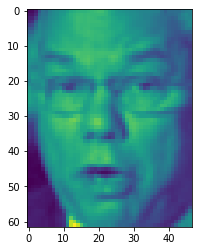

In [84]:
plt.imshow(faces.images[64])

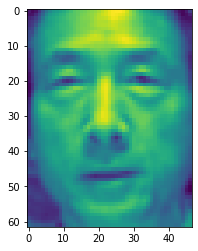

In [85]:
plt.imshow(faces.images[146])

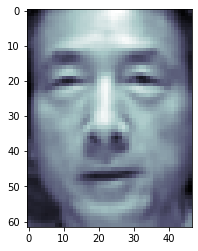

In [86]:
plt.imshow(faces.images[146], cmap='bone')

In [92]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV




pca = PCA(n_components=150, whiten=True, random_state=146)
svc = SVC(kernel='rbf', class_weight='balanced')
pipeline = make_pipeline(pca, svc)
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(pipeline, param_grid)

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                random_state=146)
%time grid.fit(X_train, y_train)
print(grid.best_params_)


CPU times: user 2min 36s, sys: 21.2 s, total: 2min 57s
Wall time: 31.2 s
{'svc__C': 1, 'svc__gamma': 0.005}


In [93]:
print('Best score: {}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))

Best score: 0.8318831390528215
Best parameters: {'svc__C': 1, 'svc__gamma': 0.005}


In [94]:
best_clf = grid.best_estimator_
best_clf



Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=146, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.005,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [100]:
grid = GridSearchCV(pipeline, param_grid, verbose=10)
%time grid.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] svc__C=1, svc__gamma=0.0001 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... svc__C=1, svc__gamma=0.0001, score=0.300, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0001 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0001, score=0.099, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0001 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0001, score=0.094, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0001 .....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0001, score=0.089, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0001 .....................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0001, score=0.099, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0005 .....................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0005, score=0.502, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0005 .....................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.5s remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0005, score=0.460, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0005 .....................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.0s remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0005, score=0.574, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0005 .....................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    3.4s remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0005, score=0.530, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0005 .....................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    3.8s remaining:    0.0s


[CV] ......... svc__C=1, svc__gamma=0.0005, score=0.520, total=   0.4s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV] .......... svc__C=1, svc__gamma=0.001, score=0.818, total=   0.4s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV] .......... svc__C=1, svc__gamma=0.001, score=0.782, total=   0.4s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV] .......... svc__C=1, svc__gamma=0.001, score=0.861, total=   0.4s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV] .......... svc__C=1, svc__gamma=0.001, score=0.837, total=   0.4s
[CV] svc__C=1, svc__gamma=0.001 ......................................
[CV] .......... svc__C=1, svc__gamma=0.001, score=0.817, total=   0.4s
[CV] svc__C=1, svc__gamma=0.005 ......................................
[CV] .......... svc__C=1, svc__gamma=0.005, score=0.798, total=   0.4s
[CV] svc__C=1, svc__gamma=0.005 ......................................
[CV] .

[CV] ........ svc__C=50, svc__gamma=0.0005, score=0.822, total=   0.3s
[CV] svc__C=50, svc__gamma=0.0005 ....................................
[CV] ........ svc__C=50, svc__gamma=0.0005, score=0.832, total=   0.3s
[CV] svc__C=50, svc__gamma=0.0005 ....................................
[CV] ........ svc__C=50, svc__gamma=0.0005, score=0.817, total=   0.3s
[CV] svc__C=50, svc__gamma=0.001 .....................................
[CV] ......... svc__C=50, svc__gamma=0.001, score=0.788, total=   0.3s
[CV] svc__C=50, svc__gamma=0.001 .....................................
[CV] ......... svc__C=50, svc__gamma=0.001, score=0.777, total=   0.3s
[CV] svc__C=50, svc__gamma=0.001 .....................................
[CV] ......... svc__C=50, svc__gamma=0.001, score=0.827, total=   0.3s
[CV] svc__C=50, svc__gamma=0.001 .....................................
[CV] ......... svc__C=50, svc__gamma=0.001, score=0.827, total=   0.3s
[CV] svc__C=50, svc__gamma=0.001 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   30.7s finished


CPU times: user 2min 31s, sys: 24.3 s, total: 2min 55s
Wall time: 31.2 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=146,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            ra

In [101]:
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=146,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            ra

In [102]:
print('Best score: {}'.format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))

Best score: 0.8318831390528215
Best parameters: {'svc__C': 1, 'svc__gamma': 0.005}


In [103]:
from pactools.grid_search import GridSearchCVProgressBar
grid = GridSearchCVProgressBar(pipeline, param_grid, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] svc__C=1, svc__gamma=0.0001 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... svc__C=1, svc__gamma=0.0001, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0001 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ...................... svc__C=1, svc__gamma=0.0001, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0001 .....................................
[CV] ...................... svc__C=1, svc__gamma=0.0001, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0001 .....................................
[CV] ...................... svc__C=1, svc__gamma=0.0001, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0001 .....................................
[CV] ...................... svc__C=1, svc__gamma=0.0001, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] ...................... svc__C=1, svc__gamma=0.0005, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] ...................... svc__C=1, svc__gamma=0.0005, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] ...................... svc__C=1, svc__gamma=0.0005, total=   0.4s
[CV] svc__C=1, svc__gamma=0.0005 .....................................
[CV] .

[CV] ...................... svc__C=10, svc__gamma=0.005, total=   0.4s
[CV] svc__C=50, svc__gamma=0.0001 ....................................
[CV] ..................... svc__C=50, svc__gamma=0.0001, total=   0.3s
[CV] svc__C=50, svc__gamma=0.0001 ....................................
[CV] ..................... svc__C=50, svc__gamma=0.0001, total=   0.3s
[CV] svc__C=50, svc__gamma=0.0001 ....................................
[CV] ..................... svc__C=50, svc__gamma=0.0001, total=   0.3s
[CV] svc__C=50, svc__gamma=0.0001 ....................................
[CV] ..................... svc__C=50, svc__gamma=0.0001, total=   0.3s
[CV] svc__C=50, svc__gamma=0.0001 ....................................
[CV] ..................... svc__C=50, svc__gamma=0.0001, total=   0.3s
[CV] svc__C=50, svc__gamma=0.0005 ....................................
[CV] ..................... svc__C=50, svc__gamma=0.0005, total=   0.3s
[CV] svc__C=50, svc__gamma=0.0005 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   30.9s finished


GridSearchCVProgressBar(cv=None, error_score=nan,
                        estimator=Pipeline(memory=None,
                                           steps=[('pca',
                                                   PCA(copy=True,
                                                       iterated_power='auto',
                                                       n_components=150,
                                                       random_state=146,
                                                       svd_solver='auto',
                                                       tol=0.0, whiten=True)),
                                                  ('svc',
                                                   SVC(C=1.0, break_ties=False,
                                                       cache_size=200,
                                                       class_weight='balanced',
                                                       coef0=0.0,
                                      

In [104]:
grid.cv_results_

{'mean_fit_time': array([0.39347067, 0.39556122, 0.38117638, 0.36393523, 0.39284067,
        0.33289943, 0.31346097, 0.37837543, 0.36491151, 0.30774865,
        0.32088289, 0.40125437, 0.3121613 , 0.3081265 , 0.31699142,
        0.38571224]),
 'std_fit_time': array([0.00446613, 0.00416804, 0.00279114, 0.00268917, 0.00194678,
        0.00183454, 0.0015996 , 0.00280579, 0.0016362 , 0.00524489,
        0.00083487, 0.00562898, 0.00284223, 0.00596966, 0.00452303,
        0.01050506]),
 'mean_score_time': array([0.0297533 , 0.02977166, 0.02951207, 0.02940373, 0.02980204,
        0.02920318, 0.02838593, 0.02887859, 0.02930884, 0.02891555,
        0.03009219, 0.03091598, 0.02957091, 0.02954106, 0.029251  ,
        0.02870355]),
 'std_score_time': array([0.0005941 , 0.00038552, 0.00071429, 0.00045882, 0.00089918,
        0.0003125 , 0.00025867, 0.00031792, 0.00024087, 0.00060807,
        0.00037188, 0.00085068, 0.00051119, 0.00084803, 0.00048553,
        0.00037432]),
 'param_svc__C': masked_ar

In [105]:
import pandas as pd
df = pd.DataFrame(grid.cv_results_)

/usr/local/Cellar/python/3.7.6_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [108]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.393471,0.004466,0.029753,0.000594,1,0.0001,"{'svc__C': 1, 'svc__gamma': 0.0001}",0.300493,0.099010,0.094059,0.089109,0.099010,0.136336,0.082160,16
1,0.395561,0.004168,0.029772,0.000386,1,0.0005,"{'svc__C': 1, 'svc__gamma': 0.0005}",0.502463,0.460396,0.574257,0.529703,0.519802,0.517324,0.037047,15
2,0.381176,0.002791,0.029512,0.000714,1,0.001,"{'svc__C': 1, 'svc__gamma': 0.001}",0.817734,0.782178,0.861386,0.836634,0.816832,0.822953,0.026044,5
3,0.363935,0.002689,0.029404,0.000459,1,0.005,"{'svc__C': 1, 'svc__gamma': 0.005}",0.798030,0.811881,0.886139,0.831683,0.831683,0.831883,0.029966,1
4,0.392841,0.001947,0.029802,0.000899,5,0.0001,"{'svc__C': 5, 'svc__gamma': 0.0001}",0.600985,0.727723,0.826733,0.806931,0.747525,0.741979,0.079392,14
5,0.332899,0.001835,0.029203,0.000313,5,0.0005,"{'svc__C': 5, 'svc__gamma': 0.0005}",0.837438,0.787129,0.851485,0.816832,0.816832,0.821943,0.021804,6
6,0.313461,0.001600,0.028386,0.000259,5,0.001,"{'svc__C': 5, 'svc__gamma': 0.001}",0.817734,0.792079,0.871287,0.826733,0.816832,0.824933,0.025880,4
7,0.378375,0.002806,0.028879,0.000318,5,0.005,"{'svc__C': 5, 'svc__gamma': 0.005}",0.793103,0.806931,0.841584,0.836634,0.826733,0.820997,0.018315,7
8,0.364912,0.001636,0.029309,0.000241,10,0.0001,"{'svc__C': 10, 'svc__gamma': 0.0001}",0.827586,0.777228,0.846535,0.836634,0.801980,0.817992,0.025189,9
9,0.307749,0.005245,0.028916,0.000608,10,0.0005,"{'svc__C': 10, 'svc__gamma': 0.0005}",0.817734,0.782178,0.856436,0.811881,0.811881,0.816022,0.023731,10


In [107]:
df.mean_test_score.max()

0.8318831390528215